**MOCHAMAD RAFFLI ISPRIYANTO** PYTN-KS10-022

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
style.use('ggplot')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, normalize, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import statsmodels.api as sm

In [71]:
df1 = pd.read_csv('bank.csv', skipinitialspace=True, sep=';')
df1.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


In [72]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [73]:
df1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [74]:
df1.shape

(4521, 17)

In [75]:
df1[df1[df1.columns]=='unknown'].count().sort_values(ascending=False)

poutcome     3705
contact      1324
education     187
job            38
month           0
previous        0
pdays           0
campaign        0
duration        0
age             0
day             0
loan            0
housing         0
balance         0
default         0
marital         0
y               0
dtype: int64

In [76]:
df1[df1[df1.columns]=='unknown']=np.nan
df1[df1[df1.columns]=='unknown'].count().sort_values(ascending=False)

age          0
day          0
poutcome     0
previous     0
pdays        0
campaign     0
duration     0
month        0
contact      0
job          0
loan         0
housing      0
balance      0
default      0
education    0
marital      0
y            0
dtype: int64

In [77]:
print("Bank Data :")
print(df1.isnull().sum().sort_values(ascending=False), "\n")

Bank Data :
poutcome     3705
contact      1324
education     187
job            38
month           0
previous        0
pdays           0
campaign        0
duration        0
age             0
day             0
loan            0
housing         0
balance         0
default         0
marital         0
y               0
dtype: int64 



In [78]:
df1.job.fillna(df1.job.mode()[0],inplace=True)
df1.education.fillna(df1.education.mode()[0],inplace=True)
df1.contact.fillna(df1.contact.mode()[0],inplace=True)
df1.poutcome.fillna(df1.poutcome.mode()[0],inplace=True) 
df1.isnull().sum()


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [79]:
df1.rename(columns={'y':'subscribed'}, inplace=True)


In [80]:
df2 = df1.copy()
le = preprocessing.LabelEncoder()
def transfrom(col):
    a = le.fit_transform(df1[col])
    pd.DataFrame(a)
    df2[col] = a
 
categorical = ['age', 
               'job', 
               'marital', 
               'education', 
               'default', 
               'balance', 
               'housing',
               'loan', 
               'contact', 
               'day', 
               'month', 
               'duration', 
               'campaign', 
               'pdays',
               'previous', 
               'poutcome', 
               'subscribed'] 

for i in categorical:
    transfrom(i)
 
df2

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,11,10,1,0,0,1475,0,0,0,18,10,75,0,0,0,0,0
1,14,7,1,1,0,2030,1,1,0,10,8,216,0,228,4,0,0
2,16,4,2,2,0,1303,1,0,0,15,0,181,0,219,1,0,0
3,11,4,1,2,0,1352,1,1,0,2,6,195,3,0,0,0,0
4,40,1,1,1,0,274,1,0,0,4,8,222,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,14,7,1,1,0,119,1,0,0,29,5,325,4,0,0,0,0
4517,38,6,1,2,1,0,1,1,0,8,8,149,0,0,0,0,0
4518,38,9,1,1,0,558,0,0,0,18,1,147,10,0,0,0,0
4519,9,1,1,1,0,1187,0,0,0,5,3,125,3,140,3,1,0


In [81]:
X=df2[['age', 
        'job', 
        'marital', 
        'education', 
        'default', 
        'balance', 
        'housing',
        'loan', 
        'contact', 
        'day', 
        'month', 
        'duration', 
        'campaign', 
        'pdays',
        'previous', 
        'poutcome', 
        'subscribed']].values
y=df2['subscribed'].values
#splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)
# Standarisasi data
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)


In [82]:
X, y

(array([[11, 10,  1, ...,  0,  0,  0],
        [14,  7,  1, ...,  4,  0,  0],
        [16,  4,  2, ...,  1,  0,  0],
        ...,
        [38,  9,  1, ...,  0,  0,  0],
        [ 9,  1,  1, ...,  3,  1,  0],
        [25,  2,  2, ...,  7,  1,  0]], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0]))

**Logistic Regression**

In [83]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

pred_lr = lr.predict(X_test)
print('Model Score: ', metrics.accuracy_score(y_test,pred_lr))
matrix_lr = confusion_matrix(y_test,pred_lr)
print(matrix_lr)

print(metrics.classification_report(y_test,pred_lr))

Model Score:  1.0
[[1208    0]
 [   0  149]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1208
           1       1.00      1.00      1.00       149

    accuracy                           1.00      1357
   macro avg       1.00      1.00      1.00      1357
weighted avg       1.00      1.00      1.00      1357



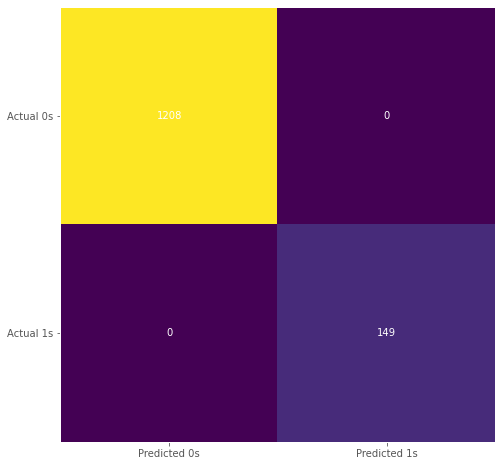

In [84]:
cm = confusion_matrix(y_test, pred_lr)
fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], 
                ha='center', 
                va='center',
                color='white')
 
plt.show()

Dari plot diatas diperoleh 1178 prediksi True negatif, 113 prediksi False negatif, 30 prediksi False  positif, 36 prediksi True positif

**Decision Tree**

In [85]:
dt = tree.DecisionTreeClassifier()
dt.fit(X_train,y_train)

pred_dt = dt.predict(X_test)
print('Accuracy Score: ', metrics.accuracy_score(y_test,pred_dt))

matrix_dt = confusion_matrix(y_test,pred_dt)
print(matrix_dt)

Accuracy Score:  1.0
[[1208    0]
 [   0  149]]


**Random Forest**

In [86]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

pred_rf=rf.predict(X_test)
print('Accuracy Score: ', metrics.accuracy_score(y_test,pred_rf))
matrix_rf = confusion_matrix(y_test,pred_rf)

print(matrix_rf)
print(classification_report(y_test,pred_rf))


Accuracy Score:  1.0
[[1208    0]
 [   0  149]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1208
           1       1.00      1.00      1.00       149

    accuracy                           1.00      1357
   macro avg       1.00      1.00      1.00      1357
weighted avg       1.00      1.00      1.00      1357



**Support Vector Machine**

In [87]:
sv = svm.SVC()
sv.fit(X_train,y_train)

pred_sv = sv.predict(X_test)
print('Accuracy Score: ', metrics.accuracy_score(y_test,pred_sv))

matrix_sv = confusion_matrix(y_test,pred_sv)
print(matrix_sv)
print(classification_report(y_test,pred_sv))

Accuracy Score:  0.9992630803242447
[[1208    0]
 [   1  148]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1208
           1       1.00      0.99      1.00       149

    accuracy                           1.00      1357
   macro avg       1.00      1.00      1.00      1357
weighted avg       1.00      1.00      1.00      1357



**Naive Bayes**

In [88]:
nb = GaussianNB()
nb.fit(X_train,y_train)

pred_nb = nb.predict(X_test)

print('Accuracy Score: ', metrics.accuracy_score(y_test,pred_nb))
matrix_nb = confusion_matrix(y_test,pred_nb)

print(matrix_nb)
print(classification_report(y_test,pred_nb))

Accuracy Score:  1.0
[[1208    0]
 [   0  149]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1208
           1       1.00      1.00      1.00       149

    accuracy                           1.00      1357
   macro avg       1.00      1.00      1.00      1357
weighted avg       1.00      1.00      1.00      1357



**K-Nearest Neighbors**

In [89]:
kn = KNeighborsClassifier()
kn.fit(X_train,y_train)

pred_kn = kn.predict(X_test)

print('Accuracy Score: ', metrics.accuracy_score(y_test,pred_kn))
matrix_kn = confusion_matrix(y_test,pred_kn)
print(matrix_kn)
print(classification_report(y_test,pred_kn))


Accuracy Score:  0.9963154016212233
[[1208    0]
 [   5  144]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1208
           1       1.00      0.97      0.98       149

    accuracy                           1.00      1357
   macro avg       1.00      0.98      0.99      1357
weighted avg       1.00      1.00      1.00      1357



Text(0, 0.5, 'Error mean')

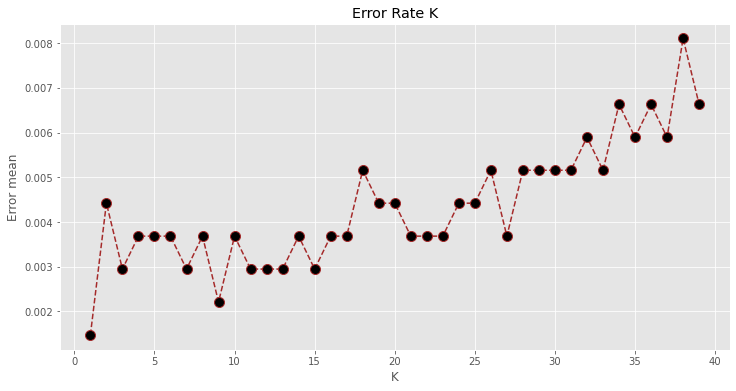

In [90]:
error = []

for i in range(1, 40): 
    kn = KNeighborsClassifier(n_neighbors=i)
    kn.fit(X_train, y_train)
    pred_i = kn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    

plt.figure(figsize=(12, 6)) 
plt.plot(range(1, 40), error, color='brown', linestyle='dashed', marker='o', markerfacecolor='black', markersize=10)
plt.title('Error Rate K') 
plt.xlabel('K') 
plt.ylabel('Error mean')


In [91]:
kn8 = KNeighborsClassifier(n_neighbors=8)

kn8.fit(X_train,y_train)
pred_kn8 = kn8.predict(X_test)

print('Accuracy Score: ', metrics.accuracy_score(y_test,pred_kn8))
matrix_kn8 = confusion_matrix(y_test,pred_kn8)
print(matrix_kn8)
print(classification_report(y_test,pred_kn8))

Accuracy Score:  0.9963154016212233
[[1208    0]
 [   5  144]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1208
           1       1.00      0.97      0.98       149

    accuracy                           1.00      1357
   macro avg       1.00      0.98      0.99      1357
weighted avg       1.00      1.00      1.00      1357



**Algorithm Analysis**

In [92]:
ac_lr = accuracy_score(y_test, pred_lr)
ac_dt = accuracy_score(y_test, pred_dt)
ac_rf = accuracy_score(y_test, pred_rf)
ac_sv = accuracy_score(y_test, pred_sv)
ac_nb = accuracy_score(y_test, pred_nb)
ac_kn8 = accuracy_score(y_test, pred_kn8)

print('Accuracy Score:')
print(' ')
print("Logistic Regression:", ac_lr)
print("Decision Tree:", ac_dt)
print("Random Forest:", ac_rf)
print("SVM:", ac_sv)
print("Naive Bayes:", ac_nb)
print("KNN:", ac_kn8)

Accuracy Score:
 
Logistic Regression: 1.0
Decision Tree: 1.0
Random Forest: 1.0
SVM: 0.9992630803242447
Naive Bayes: 1.0
KNN: 0.9963154016212233


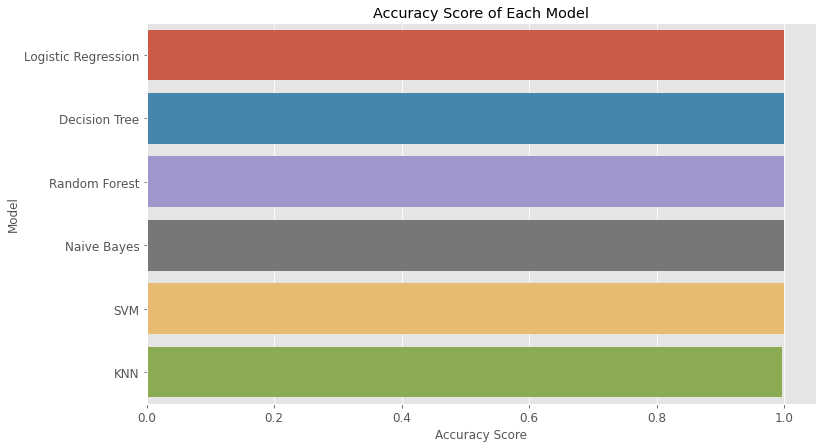

In [93]:
warna = ('greenyellow', 'red', 'lightcoral', 'lightskyblue', 'aqua', 'yellow')
model = ['Logistic Regression','Decision Tree','Random Forest','SVM','Naive Bayes','KNN']
accuracy_score = [ac_lr, ac_dt, ac_rf, ac_sv, ac_nb, ac_kn8]
df_acc = pd.DataFrame({'Model':model,'Accuracy Score':accuracy_score})
df_acc = df_acc.sort_values(['Accuracy Score'], ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x='Accuracy Score',y='Model',data = df_acc,estimator=sum,ci=None)
plt.xlabel('Accuracy Score')
plt.ylabel('Model') 
plt.title('Accuracy Score of Each Model') 
plt.xticks(size=12)
plt.yticks(size=12)
plt.show()

In [94]:
print('Model yang memiliki accuracy score tertinggi pertama adalah KNN dengan K=8 dan nilai akurasinya:')
print(ac_kn8)
print('Berikut classification report nya:')
print(classification_report(y_test,pred_kn8))
print('Dari classification report dapat diketahui bahwa nilai precision dan recall nya:')
print('Precision : ', metrics.precision_score(y_test, pred_kn8))
print('Recall : ', metrics.recall_score(y_test, pred_kn8))

Model yang memiliki accuracy score tertinggi pertama adalah KNN dengan K=8 dan nilai akurasinya:
0.9963154016212233
Berikut classification report nya:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1208
           1       1.00      0.97      0.98       149

    accuracy                           1.00      1357
   macro avg       1.00      0.98      0.99      1357
weighted avg       1.00      1.00      1.00      1357

Dari classification report dapat diketahui bahwa nilai precision dan recall nya:
Precision :  1.0
Recall :  0.9664429530201343


Diperoleh kesimpulan bahwa model yang dipilih adalah model KNN dengan nilai k=8. Model ini dipilih karena Memiliki nilai akurasi tertinggi, dimana KNN terkenal dengan tingkat keakuratan yang baik, KNN sangat nonliniear, lebih mudah dipahami dan diimplementasikan, Saat nilai k=8, model ini memiiki nilai error yang paling sedikit daripada saat menggunakan nilai k yang lain dalam range(1,40).

In [95]:
import pickle
pickle.dump(kn8, open('./model_classifier.pkl','wb'))